In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Box/skillgeek.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.dropna(axis=1)

Standardising data

In [ ]:
from sklearn.preprocessing import StandardScaler
X=df.iloc[:,2:31].values
x = StandardScaler().fit_transform(X)
print(x[0])


[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224]


principal component analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
principalComponents = pca.fit_transform(x)
print(principalComponents[0])

[ 8.96633572  1.98441334 -1.49934382  3.49405547 -1.30707117  1.54623257
  2.05284019  0.23172233 -0.45104341 -0.85658029]


In [ ]:
pcadf = pd.DataFrame(data = principalComponents, columns = ['1','2','3','4','5','6','7','8','9','10'])
pcadf.head()

,1,2,3,4,5,6,7,8,9,10
0,8.966336,1.984413,-1.499344,3.494055,-1.307071,1.546233,2.052840,0.231722,-0.451043,-0.856580
1,2.463064,-3.856484,-0.100925,1.253424,0.438338,0.128904,-0.644939,-0.071241,-0.371271,1.081810
2,5.777253,-0.841503,-0.698722,0.825640,-0.128079,0.495945,-0.610547,-0.051925,0.088972,0.452930
3,6.283637,9.494189,-3.799607,-0.254932,-2.740416,3.129004,0.893017,-1.033643,-1.620479,-1.078662
4,4.077171,-1.544879,1.258651,3.045876,0.339939,-1.204009,-1.165277,-0.497963,-0.049226,0.361277


Dimensions reduced  to 10


In [ ]:
df.shape

(569, 32)

In [ ]:
pcadf.shape

(569, 10)

In [ ]:
final= pd.concat([pcadf, df[['diagnosis']]], axis = 1)
final.head()

,1,2,3,4,5,6,7,8,9,10,diagnosis
0,8.966336,1.984413,-1.499344,3.494055,-1.307071,1.546233,2.052840,0.231722,-0.451043,-0.856580,M
1,2.463064,-3.856484,-0.100925,1.253424,0.438338,0.128904,-0.644939,-0.071241,-0.371271,1.081810,M
2,5.777253,-0.841503,-0.698722,0.825640,-0.128079,0.495945,-0.610547,-0.051925,0.088972,0.452930,M
3,6.283637,9.494189,-3.799607,-0.254932,-2.740416,3.129004,0.893017,-1.033643,-1.620479,-1.078662,M
4,4.077171,-1.544879,1.258651,3.045876,0.339939,-1.204009,-1.165277,-0.497963,-0.049226,0.361277,M


In [ ]:
pca.explained_variance_ratio_#.sum()*100

array([0.45067848, 0.18239963, 0.09159257, 0.06781847, 0.05626861,
       0.04135939, 0.01989181, 0.01637191, 0.01397121, 0.01209004])

Visualizing 3 principal components using plotly

In [ ]:
import plotly.express as px
fig = px.scatter_3d(principalComponents, x=0, y=1,z=2, color=df['diagnosis'],labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

In [ ]:
covdf=final.drop('diagnosis',axis=1)
covdf.head()

,1,2,3,4,5,6,7,8,9,10
0,8.966336,1.984413,-1.499344,3.494055,-1.307071,1.546233,2.052840,0.231722,-0.451043,-0.856580
1,2.463064,-3.856484,-0.100925,1.253424,0.438338,0.128904,-0.644939,-0.071241,-0.371271,1.081810
2,5.777253,-0.841503,-0.698722,0.825640,-0.128079,0.495945,-0.610547,-0.051925,0.088972,0.452930
3,6.283637,9.494189,-3.799607,-0.254932,-2.740416,3.129004,0.893017,-1.033643,-1.620479,-1.078662
4,4.077171,-1.544879,1.258651,3.045876,0.339939,-1.204009,-1.165277,-0.497963,-0.049226,0.361277


Covariance Matrix

In [ ]:
cov_mat=np.cov(covdf.T)
eigen_values,eigen_vectors=np.linalg.eig(cov_mat)
print(cov_mat[0])

[ 1.30926860e+01  4.25324877e-15  5.75439540e-16 -1.35103196e-15
 -2.00152883e-16 -3.00229325e-16  5.37910874e-16 -3.81541434e-16
  5.62929984e-16 -1.56369440e-16]


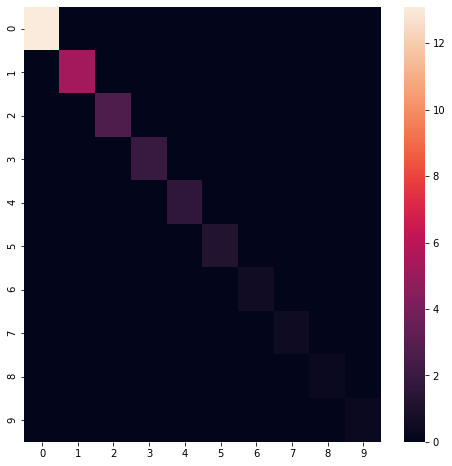

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(cov_mat)

Eigen values & Eigen Vectors

In [ ]:
print(eigen_vectors[0])

[-1.00000000e+00 -5.45723203e-16  5.51619237e-17 -1.21468503e-16
  1.74683604e-17  2.52481277e-17  4.29819523e-17  3.02401107e-17
 -1.22724924e-17 -4.43712874e-17]


In [ ]:
print(eigen_values)
type(eigen_values)

[13.09268602  5.29890201  2.66086093  1.9701981   1.63466259  1.20153401
  0.57787818  0.4756213   0.35122856  0.40587845]


numpy.ndarray

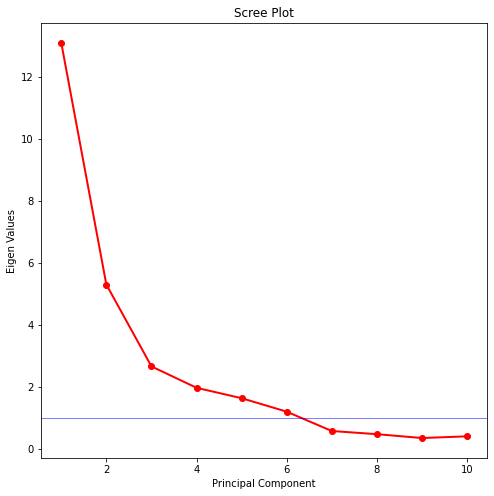

In [ ]:
fig = plt.figure(figsize = (8,8))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, eigen_values, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigen Values')
plt.axhline(y=1, linewidth=1, color='b', alpha=0.5)
#plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', color='blue',linewidth=2)
plt.show()

We can conclude that first 6 components we would need to drop remaining 4 last principal components and hold onto first 6 of them.  

In [ ]:
vmax=max(eigen_values)
vmax

13.092686021378446

In [ ]:
lis=eigen_values.tolist()
type(lis)

list

In [ ]:
print(lis)

[13.092686021378446, 5.298902013876206, 2.660860927587702, 1.970198101199861, 1.6346625887801884, 1.2015340060024182, 0.5778781822170419, 0.4756213009378971, 0.35122856023004406, 0.40587845040356496]


Kaiser's rule (>1) 

6 components can be retained as shown

In [ ]:
lists=[]
count=0
for val in lis:
  if(val>1):
    lists.append(val)
    count+=1
print(lists)

[13.092686021378446, 5.298902013876206, 2.660860927587702, 1.970198101199861, 1.6346625887801884, 1.2015340060024182]


Conditional number rule(vmax/val<10)

5 components can be retained as shown

In [ ]:
listc=[]
count=0
for val in lis:
  finals=vmax/val
  if(finals<10):
    listc.append(val)
    count+=1
print(listc)
print(count)

[13.092686021378446, 5.298902013876206, 2.660860927587702, 1.970198101199861, 1.6346625887801884]
5


In [ ]:
data=final.drop(['7', '8','9','10'], axis = 1)
data.head()

,1,2,3,4,5,6,diagnosis
0,8.966336,1.984413,-1.499344,3.494055,-1.307071,1.546233,M
1,2.463064,-3.856484,-0.100925,1.253424,0.438338,0.128904,M
2,5.777253,-0.841503,-0.698722,0.825640,-0.128079,0.495945,M
3,6.283637,9.494189,-3.799607,-0.254932,-2.740416,3.129004,M
4,4.077171,-1.544879,1.258651,3.045876,0.339939,-1.204009,M


Exporting dataframe into a csv file

In [ ]:
df.to_csv('skilldata.csv')
!cp skilldata.csv "drive/My Drive/Box"

Data visualization

In [ ]:
x=data['1']
y=data['2']
z=data['3']

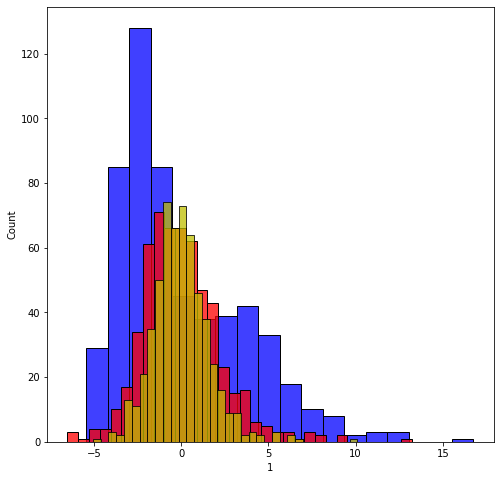

In [ ]:
fig = plt.figure(figsize = (8,8))
sns.histplot(data=data['1'],color='b')
sns.histplot(data=y,color='r')
sns.histplot(data=z,color='y')